In [27]:
from IPython.display import display, HTML

display(
    HTML("""
<style>
* {font-family:D2Coding;}
div.container{width:87% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input { font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:3px;}
table.dataframe{font-size:12px;}
</style>
"""))

<font size=5 color=red>08_DNN(딥러닝)_MNIST(손글씨데이터)</font>

# 데이터셋을 라이브러리에서 가져울 예정, 파일에서도 가져옴

In [2]:
import numpy as np
import pandas as pd 
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 데스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from matplotlib import pyplot as plt # 학습과정 loss, acc 시작화
# quiz에서는 scale 조정, train_test_split 등을 추가

2025-06-13 10:40:16.081371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
import numpy as np
data = np.loadtxt('./data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [5]:
import matplotlib.pyplot as pit
print('타켓 :', data[0,0])
# print('이미지(28*28을 1차원으로 :',data[0, 1:].reshape(28,28))


타켓 : 5.0


In [81]:
for row in data[1, 1:].reshape(28,28):
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

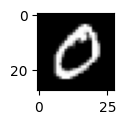

In [6]:
plt.figure(figsize=(1,1))
plt.imshow(data[1, 1:].reshape(28,28), cmap='gray')

In [83]:
# % pip install opencv-contrib-python

In [84]:
# ! pip show opencv-contrib-python

In [85]:
# % pip install opencv-python

In [7]:
# 칼라사진 → 흑백모드의 넘파이 배열로 
import cv2
image_gray = cv2.imread('./data/color_image1.jpeg',cv2.IMREAD_GRAYSCALE) # cv2.IMREAD_GRAYSCALE 흑백포멧으로 읽기
print(image_gray.shape)
print(type(image_gray))

(194, 259)
<class 'numpy.ndarray'>


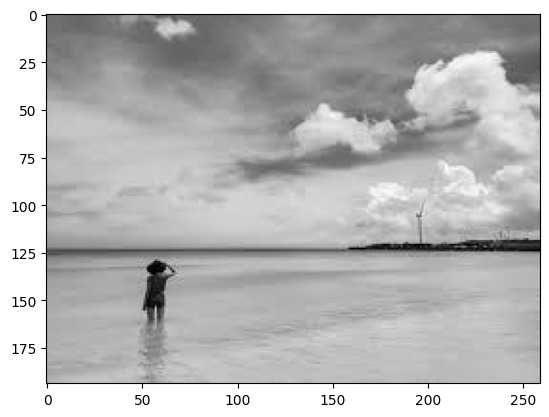

In [8]:
plt.imshow(image_gray, cmap='gray')

## 1. 데이터 생성 및 전처리

In [186]:
# print(mnist.load_data())

# 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)  # (60000, 28, 28), (60000,)
print(X_test.shape, y_test.shape)    # (10000, 28, 28), (10000,)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [187]:
print(y_train[0])
for row in X_train[0]:
    for pixel in row:
        print('{:3.0f}'.format(pixel), end='')
    print()

5
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0

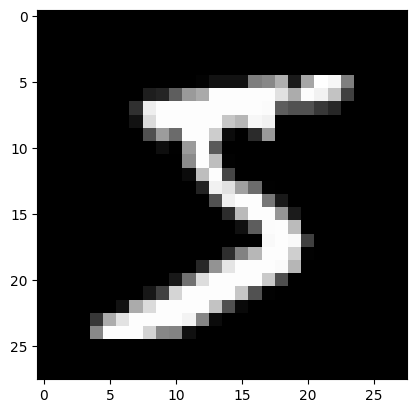

In [188]:
plt.imshow(X_train[0], cmap='gray')

In [189]:
# 학습셋(6만개) → 훈련셋(5만개)+검증셋(만개)로 분리
# 검증셋(만개)
X_val = X_train[50000:]
y_val = y_train[50000:]

# 훈련셋(5만개)
X_train = X_train[:50000]
y_train = y_train[:50000]

In [190]:
# 학습셋(5만개:fit용), 검증셋(만개:fit용), 테스트셋(만개:평가용)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(50000, 28, 28) (50000,)
(10000, 28, 28) (10000,)
(10000, 28, 28) (10000,)


In [191]:
# 입력(독립)변수 : (n, 28,28) → (n, 784) → 실수형변환 → 스케일조정(255,0 으로 나눠)
train_X = X_train.reshape(50000, 784).astype('float32') / 255.0
val_X = X_val.reshape(10000, -1).astype('float32') / 255.0
test_X = X_test.reshape(10000, -1).astype('float32') / 255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [192]:
# 훈련셋5만개 → 700개, 테스트셋1만개 → 300개 추출 (학습시간 절약)
train_idx = np.random.choice(50000, 700)
val_idx  = np.random.choice(10000, 300)

train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X   = val_X[val_idx]
y_val   = y_val[val_idx]

train_X.shape, y_train.shape, val_X.shape, y_val.shape

((700, 784), (700,), (300, 784), (300,))

In [193]:
# 타켓(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)


print(train_X.shape, train_Y.shape)
print(val_X.shape, val_Y.shape)
print(test_X.shape, test_Y.shape)

(700, 784) (700, 10)
(300, 784) (300, 10)
(10000, 784) (10000, 10)


## 2. 모델 구성

In [194]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 2)                 1570      
                                                                 
 dense_17 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [195]:
model.compile(
    loss=
    'categorical_crossentropy',  # sparse_categorical_crossentropy (내부적으로 y 원핫인코딩을 해 준다.)
    optimizer='adam',  # 
    metrics=['accuracy']  #
)

## 4. 모델 학습

In [196]:
%%time
hist = model.fit(train_X, train_Y,
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y))

Epoch 1/500
7/7 [==============================] - 1s 32ms/step - loss: 2.3305 - accuracy: 0.0929 - val_loss: 2.2947 - val_accuracy: 0.1333
Epoch 2/500
7/7 [==============================] - 0s 10ms/step - loss: 2.2928 - accuracy: 0.1157 - val_loss: 2.2860 - val_accuracy: 0.0767
Epoch 3/500
7/7 [==============================] - 0s 8ms/step - loss: 2.2797 - accuracy: 0.1529 - val_loss: 2.2714 - val_accuracy: 0.0933
Epoch 4/500
7/7 [==============================] - 0s 20ms/step - loss: 2.2685 - accuracy: 0.1543 - val_loss: 2.2593 - val_accuracy: 0.1067
Epoch 5/500
7/7 [==============================] - 0s 20ms/step - loss: 2.2550 - accuracy: 0.1614 - val_loss: 2.2482 - val_accuracy: 0.1267
Epoch 6/500
7/7 [==============================] - 0s 8ms/step - loss: 2.2433 - accuracy: 0.1757 - val_loss: 2.2371 - val_accuracy: 0.1533
Epoch 7/500
7/7 [==============================] - 0s 19ms/step - loss: 2.2324 - accuracy: 0.1857 - val_loss: 2.2266 - val_accuracy: 0.1600
Epoch 8/500
7/7 [=====

7/7 [==============================] - 0s 19ms/step - loss: 1.6593 - accuracy: 0.3914 - val_loss: 1.6647 - val_accuracy: 0.3700
Epoch 60/500
7/7 [==============================] - 0s 16ms/step - loss: 1.6536 - accuracy: 0.3914 - val_loss: 1.6612 - val_accuracy: 0.3567
Epoch 61/500
7/7 [==============================] - 0s 21ms/step - loss: 1.6476 - accuracy: 0.3886 - val_loss: 1.6565 - val_accuracy: 0.3667
Epoch 62/500
7/7 [==============================] - 0s 44ms/step - loss: 1.6419 - accuracy: 0.3957 - val_loss: 1.6533 - val_accuracy: 0.3633
Epoch 63/500
7/7 [==============================] - 0s 9ms/step - loss: 1.6357 - accuracy: 0.4000 - val_loss: 1.6493 - val_accuracy: 0.3733
Epoch 64/500
7/7 [==============================] - 0s 8ms/step - loss: 1.6312 - accuracy: 0.3957 - val_loss: 1.6455 - val_accuracy: 0.3633
Epoch 65/500
7/7 [==============================] - 0s 8ms/step - loss: 1.6245 - accuracy: 0.4057 - val_loss: 1.6430 - val_accuracy: 0.3667
Epoch 66/500
7/7 [===========

7/7 [==============================] - 0s 11ms/step - loss: 1.4025 - accuracy: 0.5029 - val_loss: 1.5331 - val_accuracy: 0.4100
Epoch 118/500
7/7 [==============================] - 0s 9ms/step - loss: 1.3994 - accuracy: 0.5057 - val_loss: 1.5321 - val_accuracy: 0.4133
Epoch 119/500
7/7 [==============================] - 0s 9ms/step - loss: 1.3972 - accuracy: 0.5086 - val_loss: 1.5305 - val_accuracy: 0.4167
Epoch 120/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3928 - accuracy: 0.5143 - val_loss: 1.5285 - val_accuracy: 0.4200
Epoch 121/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3898 - accuracy: 0.5100 - val_loss: 1.5275 - val_accuracy: 0.4167
Epoch 122/500
7/7 [==============================] - 0s 7ms/step - loss: 1.3877 - accuracy: 0.5143 - val_loss: 1.5267 - val_accuracy: 0.4233
Epoch 123/500
7/7 [==============================] - 0s 8ms/step - loss: 1.3836 - accuracy: 0.5129 - val_loss: 1.5240 - val_accuracy: 0.4233
Epoch 124/500
7/7 [=======

Epoch 175/500
7/7 [==============================] - 0s 17ms/step - loss: 1.2523 - accuracy: 0.5757 - val_loss: 1.4953 - val_accuracy: 0.4300
Epoch 176/500
7/7 [==============================] - 0s 18ms/step - loss: 1.2509 - accuracy: 0.5743 - val_loss: 1.4937 - val_accuracy: 0.4300
Epoch 177/500
7/7 [==============================] - 0s 8ms/step - loss: 1.2489 - accuracy: 0.5757 - val_loss: 1.4938 - val_accuracy: 0.4300
Epoch 178/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2475 - accuracy: 0.5757 - val_loss: 1.4954 - val_accuracy: 0.4300
Epoch 179/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2459 - accuracy: 0.5757 - val_loss: 1.4941 - val_accuracy: 0.4267
Epoch 180/500
7/7 [==============================] - 0s 7ms/step - loss: 1.2442 - accuracy: 0.5814 - val_loss: 1.4924 - val_accuracy: 0.4267
Epoch 181/500
7/7 [==============================] - 0s 12ms/step - loss: 1.2418 - accuracy: 0.5771 - val_loss: 1.4962 - val_accuracy: 0.4300
Epoch 182/

Epoch 233/500
7/7 [==============================] - 0s 9ms/step - loss: 1.1512 - accuracy: 0.6129 - val_loss: 1.5000 - val_accuracy: 0.4400
Epoch 234/500
7/7 [==============================] - 0s 9ms/step - loss: 1.1495 - accuracy: 0.6143 - val_loss: 1.4970 - val_accuracy: 0.4367
Epoch 235/500
7/7 [==============================] - 0s 8ms/step - loss: 1.1479 - accuracy: 0.6171 - val_loss: 1.4996 - val_accuracy: 0.4367
Epoch 236/500
7/7 [==============================] - 0s 10ms/step - loss: 1.1466 - accuracy: 0.6157 - val_loss: 1.5001 - val_accuracy: 0.4433
Epoch 237/500
7/7 [==============================] - 0s 7ms/step - loss: 1.1452 - accuracy: 0.6171 - val_loss: 1.4986 - val_accuracy: 0.4333
Epoch 238/500
7/7 [==============================] - 0s 9ms/step - loss: 1.1436 - accuracy: 0.6171 - val_loss: 1.5000 - val_accuracy: 0.4367
Epoch 239/500
7/7 [==============================] - 0s 9ms/step - loss: 1.1424 - accuracy: 0.6171 - val_loss: 1.5000 - val_accuracy: 0.4400
Epoch 240/50

Epoch 291/500
7/7 [==============================] - 0s 9ms/step - loss: 1.0775 - accuracy: 0.6486 - val_loss: 1.5115 - val_accuracy: 0.4300
Epoch 292/500
7/7 [==============================] - 0s 11ms/step - loss: 1.0770 - accuracy: 0.6500 - val_loss: 1.5116 - val_accuracy: 0.4367
Epoch 293/500
7/7 [==============================] - 0s 8ms/step - loss: 1.0759 - accuracy: 0.6514 - val_loss: 1.5131 - val_accuracy: 0.4300
Epoch 294/500
7/7 [==============================] - 0s 12ms/step - loss: 1.0749 - accuracy: 0.6529 - val_loss: 1.5129 - val_accuracy: 0.4400
Epoch 295/500
7/7 [==============================] - 0s 12ms/step - loss: 1.0738 - accuracy: 0.6500 - val_loss: 1.5130 - val_accuracy: 0.4333
Epoch 296/500
7/7 [==============================] - 0s 10ms/step - loss: 1.0726 - accuracy: 0.6514 - val_loss: 1.5139 - val_accuracy: 0.4333
Epoch 297/500
7/7 [==============================] - 0s 9ms/step - loss: 1.0717 - accuracy: 0.6514 - val_loss: 1.5142 - val_accuracy: 0.4367
Epoch 298

Epoch 349/500
7/7 [==============================] - 0s 9ms/step - loss: 1.0252 - accuracy: 0.6714 - val_loss: 1.5432 - val_accuracy: 0.4333
Epoch 350/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0251 - accuracy: 0.6743 - val_loss: 1.5409 - val_accuracy: 0.4300
Epoch 351/500
7/7 [==============================] - 0s 8ms/step - loss: 1.0242 - accuracy: 0.6757 - val_loss: 1.5433 - val_accuracy: 0.4333
Epoch 352/500
7/7 [==============================] - 0s 8ms/step - loss: 1.0231 - accuracy: 0.6757 - val_loss: 1.5450 - val_accuracy: 0.4333
Epoch 353/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0223 - accuracy: 0.6729 - val_loss: 1.5442 - val_accuracy: 0.4333
Epoch 354/500
7/7 [==============================] - 0s 8ms/step - loss: 1.0218 - accuracy: 0.6786 - val_loss: 1.5440 - val_accuracy: 0.4333
Epoch 355/500
7/7 [==============================] - 0s 7ms/step - loss: 1.0209 - accuracy: 0.6757 - val_loss: 1.5460 - val_accuracy: 0.4333
Epoch 356/500

Epoch 407/500
7/7 [==============================] - 0s 10ms/step - loss: 0.9778 - accuracy: 0.6914 - val_loss: 1.5891 - val_accuracy: 0.4367
Epoch 408/500
7/7 [==============================] - 0s 12ms/step - loss: 0.9771 - accuracy: 0.6886 - val_loss: 1.5863 - val_accuracy: 0.4367
Epoch 409/500
7/7 [==============================] - 0s 11ms/step - loss: 0.9770 - accuracy: 0.6886 - val_loss: 1.5858 - val_accuracy: 0.4333
Epoch 410/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9754 - accuracy: 0.6886 - val_loss: 1.5925 - val_accuracy: 0.4367
Epoch 411/500
7/7 [==============================] - 0s 10ms/step - loss: 0.9750 - accuracy: 0.6900 - val_loss: 1.5882 - val_accuracy: 0.4367
Epoch 412/500
7/7 [==============================] - 0s 10ms/step - loss: 0.9759 - accuracy: 0.6914 - val_loss: 1.5860 - val_accuracy: 0.4367
Epoch 413/500
7/7 [==============================] - 0s 10ms/step - loss: 0.9743 - accuracy: 0.6871 - val_loss: 1.5948 - val_accuracy: 0.4367
Epoch 4

Epoch 465/500
7/7 [==============================] - 0s 9ms/step - loss: 0.9412 - accuracy: 0.7000 - val_loss: 1.6307 - val_accuracy: 0.4367
Epoch 466/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9405 - accuracy: 0.7029 - val_loss: 1.6351 - val_accuracy: 0.4267
Epoch 467/500
7/7 [==============================] - 0s 10ms/step - loss: 0.9396 - accuracy: 0.6986 - val_loss: 1.6371 - val_accuracy: 0.4333
Epoch 468/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9394 - accuracy: 0.7029 - val_loss: 1.6344 - val_accuracy: 0.4333
Epoch 469/500
7/7 [==============================] - 0s 11ms/step - loss: 0.9388 - accuracy: 0.7014 - val_loss: 1.6381 - val_accuracy: 0.4333
Epoch 470/500
7/7 [==============================] - 0s 9ms/step - loss: 0.9379 - accuracy: 0.6986 - val_loss: 1.6363 - val_accuracy: 0.4333
Epoch 471/500
7/7 [==============================] - 0s 8ms/step - loss: 0.9373 - accuracy: 0.7000 - val_loss: 1.6380 - val_accuracy: 0.4333
Epoch 472/5

## 5. 모델 평가하기

In [197]:
# 학습 과정 살펴보기
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

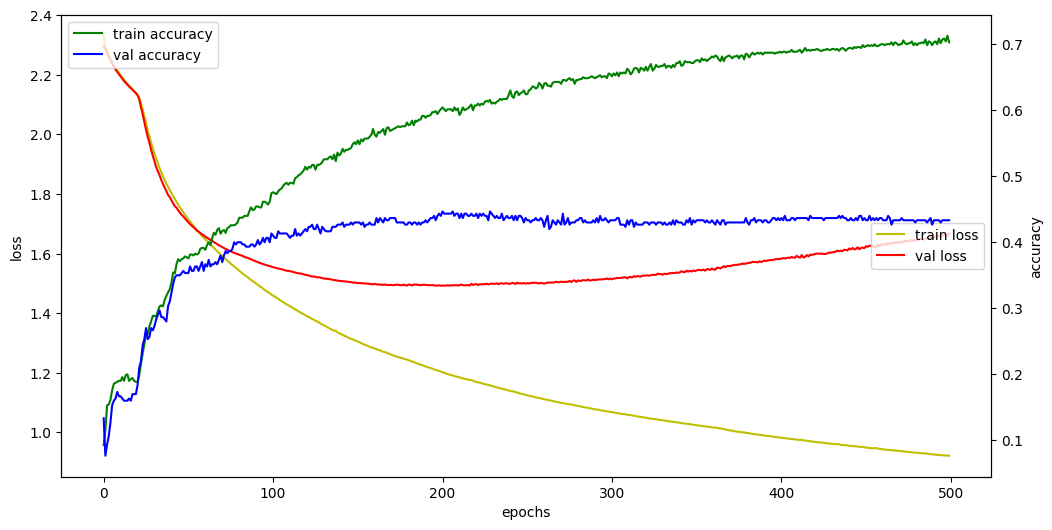

In [198]:
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

In [200]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 1.8857167959213257
accuracy : 0.4406000077724457


## ※ 위 모델(DNN)의 accuracy 늘리기

- 데이터 확보
- 모델 추가(레이어추가, units수 증가)
- 과적합 방지(validation data추가, dropout, 활성화함수)
- epoch 조정
- optimizer 변경

Epoch 1/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.2080 - accuracy: 0.9375 - val_loss: 0.1252 - val_accuracy: 0.9614
Epoch 2/100
1563/1563 [==============================] - 21s 13ms/step - loss: 0.0932 - accuracy: 0.9718 - val_loss: 0.1264 - val_accuracy: 0.9618
Epoch 3/100
1563/1563 [==============================] - 21s 14ms/step - loss: 0.0664 - accuracy: 0.9803 - val_loss: 0.0952 - val_accuracy: 0.9731
Epoch 4/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0554 - accuracy: 0.9832 - val_loss: 0.0894 - val_accuracy: 0.9764
Epoch 5/100
1563/1563 [==============================] - 23s 15ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0835 - val_accuracy: 0.9777
Epoch 6/100
1563/1563 [==============================] - 24s 15ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.1080 - val_accuracy: 0.9742
Epoch 7/100
1563/1563 [==============================] - 24s 15ms/step - loss: 0.0316 - accuracy: 0.9907 - val_loss: 0

1563/1563 [==============================] - 29s 19ms/step - loss: 0.0077 - accuracy: 0.9988 - val_loss: 0.2134 - val_accuracy: 0.9819
Epoch 57/100
1563/1563 [==============================] - 29s 18ms/step - loss: 0.0110 - accuracy: 0.9981 - val_loss: 0.2591 - val_accuracy: 0.9820
Epoch 58/100
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0108 - accuracy: 0.9984 - val_loss: 0.2772 - val_accuracy: 0.9821
Epoch 59/100
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0139 - accuracy: 0.9983 - val_loss: 0.2114 - val_accuracy: 0.9810
Epoch 60/100
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0131 - accuracy: 0.9985 - val_loss: 0.2401 - val_accuracy: 0.9812
Epoch 61/100
1563/1563 [==============================] - 28s 18ms/step - loss: 0.0043 - accuracy: 0.9990 - val_loss: 0.2216 - val_accuracy: 0.9814
Epoch 62/100
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0133 - accuracy: 0.9979 - val_loss: 0.2514 

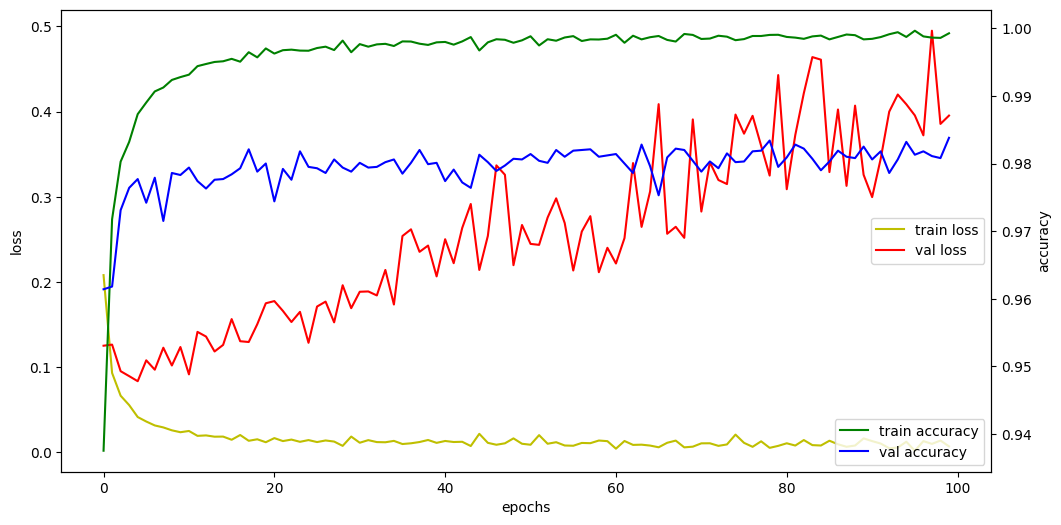

loss : 0.40029680728912354
accuracy : 0.9828000068664551
CPU times: user 1h 28min 32s, sys: 7min 3s, total: 1h 35min 35s
Wall time: 1h 8min 47s


In [208]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32')/255.0
val_X   = X_val.reshape(10000, -1).astype('float32')/255.0
test_X = X_test.reshape(10000, -1).astype('float32')/255.0
# 50000개 -> 700개 / 10000개 -> 300
# train_idx = np.random.choice(50000, 700)
# val_idx  = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# y_train = y_train[train_idx]
# val_X   = val_X[val_idx]
# y_val   = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu')) # tanh, relu, elu, gelu
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='elu'))
model.add(Dropout(0.3))
model.add(Dense(units=256)) #  activation='leakyrelu'사용불가
from tensorflow.keras.layers import LeakyReLU
model.add(LeakyReLU(alpha=0.01)) 
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='nadam',
             metrics=['accuracy'])
# 학습
hist = model.fit(train_X, train_Y,
                epochs=50,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)
fig, loss_ax = plt.subplots(figsize=(12,6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()


In [211]:
# 모델 평가하기
loss_and_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_and_metrics[0])
print('accuracy :', loss_and_metrics[1])

loss : 0.40029680728912354
accuracy : 0.9828000068664551


In [212]:
# 실재값
# test_Y.argmax(axis=1)
# y_test

test_Y.argmax(axis=1) == y_test


array([ True,  True,  True, ...,  True,  True,  True])

In [213]:
# 예측값
yhat = model.predict(test_X).argmax(axis=1)
yhat = np.argmax(model.predict(test_X), axis=1)
yhat

313/313 [==============================] - 2s 5ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [214]:
pd.crosstab(y_test, yhat)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,972,1,1,0,0,0,5,1,0,0
1,0,1128,1,2,0,0,0,1,3,0
2,4,1,1016,1,1,0,1,6,2,0
3,2,0,3,995,0,3,0,4,2,1
4,2,0,1,0,962,0,5,3,1,8
5,4,0,0,7,0,868,5,1,5,2
6,5,3,0,0,2,3,941,0,4,0
7,1,4,4,1,0,0,0,1011,3,4
8,2,1,2,2,4,1,3,4,952,3


In [217]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, yhat)

array([[ 972,    1,    1,    0,    0,    0,    5,    1,    0,    0],
       [   0, 1128,    1,    2,    0,    0,    0,    1,    3,    0],
       [   4,    1, 1016,    1,    1,    0,    1,    6,    2,    0],
       [   2,    0,    3,  995,    0,    3,    0,    4,    2,    1],
       [   2,    0,    1,    0,  962,    0,    5,    3,    1,    8],
       [   4,    0,    0,    7,    0,  868,    5,    1,    5,    2],
       [   5,    3,    0,    0,    2,    3,  941,    0,    4,    0],
       [   1,    4,    4,    1,    0,    0,    0, 1011,    3,    4],
       [   2,    1,    2,    2,    4,    1,    3,    4,  952,    3],
       [   3,    4,    1,    4,    8,    1,    1,    2,    2,  983]])

In [219]:
# 틀린갯수
10000-10000*loss_and_metrics[1]

171.99993133544922

In [220]:
cnt = 0

for y, h in zip(y_test, yhat):
    if y != h:
        cnt +=1
print('틀린갯수 : ', cnt)

틀린갯수 :  172


In [221]:
# 모델 저장
model.save('./model/08_mnist.h5')

# 콜백함수1 : 로그출력

In [222]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [230]:
%%time
# 매번 로그 출력을 하면 지저분해 질수 있으니, 특정 에포트마다 로그 출력하도록 제한
class Customhistory(Callback):

    def __init__(self):  # 생성자함수
        self.epoch = 0

    def on_epoch_end(self, batch, logs={}):  # 1. epoch마다 자동 실행되는 함수
        self.epoch += 1  # epoch마다 self.epoch 값을 1씪 증가
        if (self.epoch % 10 == 0):
            print(' epoch: {}, loss: {}, acc: {}, val_loss: {}, val_acc: {}'.
                  format(self.epoch, logs.get('loss'),
                         logs.get('accuracy', '-'), logs.get('val_loss', '-'),
                         logs.get('val_accuracy'), '-'))


(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 학습셋(6만개) -> 훈련셋(5만개)+검증셋(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
train_X = X_train.reshape(50000, 784).astype('float32') / 255.0
val_X = X_val.reshape(10000, -1).astype('float32') / 255.0
test_X = X_test.reshape(10000, -1).astype('float32') / 255.0
# 50000개 -> 700개 / 10000개 -> 300
train_idx = np.random.choice(50000, 700)
val_idx = np.random.choice(10000, 300)
train_X = train_X[train_idx]
y_train = y_train[train_idx]
val_X = val_X[val_idx]
y_val = y_val[val_idx]
# 타겟(종속)변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y = to_categorical(y_val)
test_Y = to_categorical(y_test)
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape
# 모델 생성
model = Sequential()
model.add(Input(shape=(784, )))
model.add(Dense(units=2, activation='relu'))  # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(
    loss='categorical_crossentropy',  # sparse_categorical_crossentropy
    optimizer='nadam',
    metrics=['accuracy'])
# 학습
customhistory = Customhistory()
hist = model.fit(train_X,
                 train_Y,
                 epochs=50,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=0, 
                 callbacks=[customhistory]) # 콜백함수

 epoch: 10, loss: 2.003993272781372, acc: 0.31857141852378845, val_loss: 1.995082139968872, val_acc: 0.33000001311302185
 epoch: 20, loss: 1.8419448137283325, acc: 0.3985714316368103, val_loss: 1.850698471069336, val_acc: 0.3766666650772095
 epoch: 30, loss: 1.7361212968826294, acc: 0.4328571557998657, val_loss: 1.7650045156478882, val_acc: 0.38333332538604736
 epoch: 40, loss: 1.6571696996688843, acc: 0.42571428418159485, val_loss: 1.7056289911270142, val_acc: 0.40666666626930237
 epoch: 50, loss: 1.592827320098877, acc: 0.4399999976158142, val_loss: 1.660902738571167, val_acc: 0.4233333468437195
CPU times: user 3.18 s, sys: 304 ms, total: 3.48 s
Wall time: 3.19 s


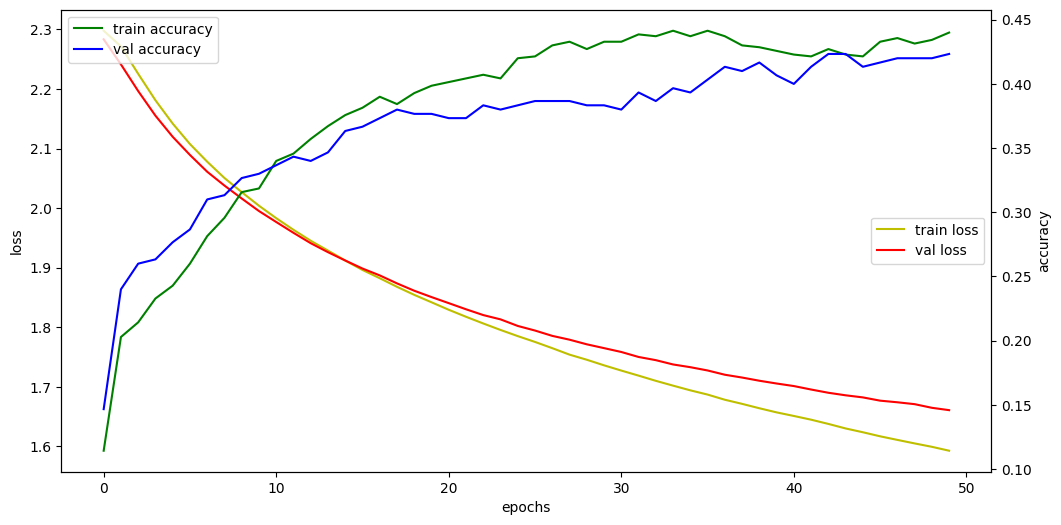

In [231]:
fig, loss_ax = plt.subplots(figsize=(12, 6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# 콜백함수2 : EarlyStopping

- val_loss 값이 늘어가면, 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy 값이 감소하면, 지정한 epoch를 다 수행하지 않고 조기 종료

In [234]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784, )))
model.add(Dense(units=2, activation='relu'))  # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(
    loss='categorical_crossentropy',  # sparse_categorical_crossentropy
    optimizer='nadam',
    metrics=['accuracy'])

# 학습
earlystopping = EarlyStopping(monitor='val_accuracy', patience=2) # 모니터 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료

hist = model.fit(train_X,
                 train_Y,
                 epochs=500,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=1,
                 callbacks=[earlystopping]) # 콜백함수

Epoch 1/500
7/7 [==============================] - 1s 32ms/step - loss: 2.3214 - accuracy: 0.0986 - val_loss: 2.2684 - val_accuracy: 0.1033
Epoch 2/500
7/7 [==============================] - 0s 11ms/step - loss: 2.2588 - accuracy: 0.1343 - val_loss: 2.2262 - val_accuracy: 0.1200
Epoch 3/500
7/7 [==============================] - 0s 9ms/step - loss: 2.2164 - accuracy: 0.1686 - val_loss: 2.1917 - val_accuracy: 0.1500
Epoch 4/500
7/7 [==============================] - 0s 10ms/step - loss: 2.1779 - accuracy: 0.1871 - val_loss: 2.1600 - val_accuracy: 0.1467
Epoch 5/500
7/7 [==============================] - 0s 13ms/step - loss: 2.1437 - accuracy: 0.1971 - val_loss: 2.1306 - val_accuracy: 0.1533
Epoch 6/500
7/7 [==============================] - 0s 13ms/step - loss: 2.1136 - accuracy: 0.2143 - val_loss: 2.1020 - val_accuracy: 0.1633
Epoch 7/500
7/7 [==============================] - 0s 13ms/step - loss: 2.0854 - accuracy: 0.2143 - val_loss: 2.0779 - val_accuracy: 0.1833
Epoch 8/500
7/7 [====

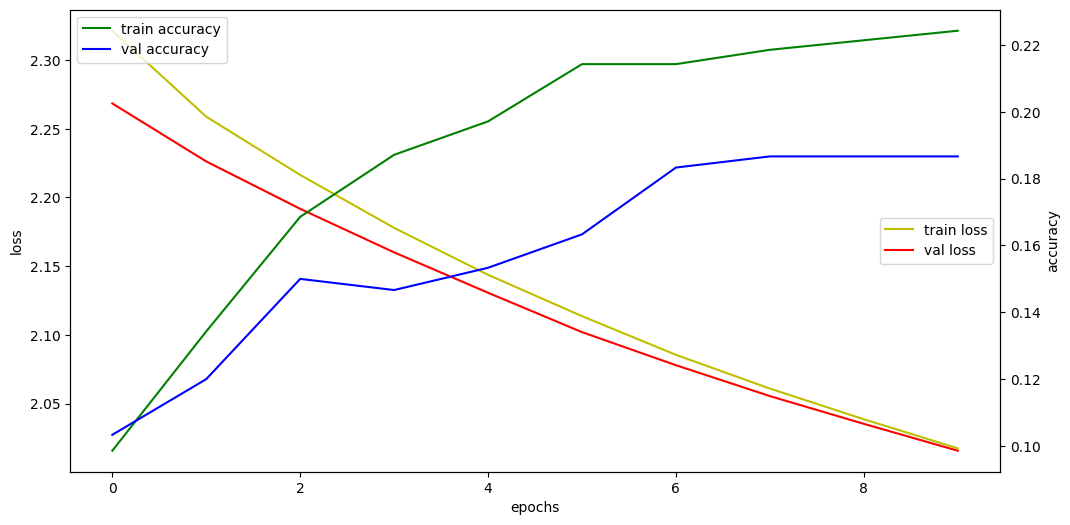

In [235]:
fig, loss_ax = plt.subplots(figsize=(12, 6))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accuracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend()
plt.show()

# 콜백함수3: ModelCheckpoint

- epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동으로 저장하는 콜백

In [240]:
# 모델 생성
model = Sequential()
model.add(Input(shape=(784, )))
model.add(Dense(units=2, activation='relu'))  # tanh, relu, elu, gelu
model.add(Dense(units=10, activation='softmax'))
# 학습과정 설정
model.compile(
    loss='categorical_crossentropy',  # sparse_categorical_crossentropy
    optimizer='nadam',
    metrics=['accuracy'])

# 학습
# 모니터 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기종료
earlystopping = EarlyStopping(monitor='val_accuracy', patience=10)

# 모델 자동 저장 콜백
import os

model_save_folder = './model08/'
if not os.path.exists(model_save_folder):  # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)

# file = model_save_folder + 'mnist-{epoch:03d}-val{val-accuracy:.4f}.h5'
file = model_save_folder + 'mnist-{epoch:03d}-val{val_accuracy:.4f}.h5'


checkpoint = ModelCheckpoint(
    filepath=file,  # 파일 경로
    monitor='val_accuracy',  # 모니터링 지표
    save_best_only=True,  # 모니터링 지표가 개선된 경우만 저장
    mode='max',  # 값이 클수록 저장
    verbose=1  # 저장시 로그 출력
)

#
hist = model.fit(train_X,
                 train_Y,
                 epochs=500,
                 batch_size=100,
                 validation_data=(val_X, val_Y),
                 verbose=1,
                 callbacks=[earlystopping, checkpoint])  # 콜백함수

Epoch 1/500
1/7 [===>..........................] - ETA: 4s - loss: 2.2999 - accuracy: 0.1000
Epoch 1: val_accuracy improved from -inf to 0.09333, saving model to ./model08/mnist-001-val0.0933.h5
7/7 [==============================] - 1s 40ms/step - loss: 2.2971 - accuracy: 0.0914 - val_loss: 2.2865 - val_accuracy: 0.0933
Epoch 2/500
3/7 [===========>..................] - ETA: 0s - loss: 2.2843 - accuracy: 0.1533
Epoch 2: val_accuracy improved from 0.09333 to 0.13333, saving model to ./model08/mnist-002-val0.1333.h5
7/7 [==============================] - 0s 27ms/step - loss: 2.2695 - accuracy: 0.1671 - val_loss: 2.2495 - val_accuracy: 0.1333
Epoch 3/500
5/7 [====================>.........] - ETA: 0s - loss: 2.2344 - accuracy: 0.1840
Epoch 3: val_accuracy improved from 0.13333 to 0.14000, saving model to ./model08/mnist-003-val0.1400.h5
7/7 [==============================] - 0s 25ms/step - loss: 2.2374 - accuracy: 0.1700 - val_loss: 2.2243 - val_accuracy: 0.1400
Epoch 4/500
5/7 [========

In [241]:
model.evaluate(val_X, val_Y)

10/10 [==============================] - 0s 2ms/step - loss: 2.0577 - accuracy: 0.1967


[2.0577468872070312, 0.1966666728258133]